## 2. Explanatory data analysis
### 2.1 Data Cleaning

In [80]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Importing the dataset

In [81]:
df = pd.read_csv('../data/GEFCom2014Data/Wind/raw_data_incl_features.csv')
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,IS_HOLIDAY,WS10,WS100,WD10,WD100,WD100CARD,WD10CARD,U100NORM,V100NORM
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,1,3.421530,4.652334,321.614439,321.999735,NW,NW,0.615665,-0.788008
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,1,3.096451,4.154892,305.473680,306.385781,NW,NW,0.805041,-0.593219
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,1,2.795932,3.712577,287.108562,289.088098,WNW,WNW,0.945017,-0.327022
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,1,2.461699,3.234831,273.345160,276.310236,W,W,0.993941,-0.109912
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,1,2.279435,2.976332,260.159324,263.581938,W,W,0.993733,0.111782


Inspecting tha data

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175440 entries, 0 to 175439
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ZONEID      175440 non-null  int64  
 1   TIMESTAMP   175440 non-null  object 
 2   TARGETVAR   175265 non-null  float64
 3   U10         175440 non-null  float64
 4   V10         175440 non-null  float64
 5   U100        175440 non-null  float64
 6   V100        175440 non-null  float64
 7   HOUR        175440 non-null  int64  
 8   MONTH       175440 non-null  int64  
 9   WEEKDAY     175440 non-null  int64  
 10  IS_HOLIDAY  175440 non-null  int64  
 11  WS10        175440 non-null  float64
 12  WS100       175440 non-null  float64
 13  WD10        175440 non-null  float64
 14  WD100       175440 non-null  float64
 15  WD100CARD   175440 non-null  object 
 16  WD10CARD    175440 non-null  object 
 17  U100NORM    175440 non-null  float64
 18  V100NORM    175440 non-null  float64
dtypes:

In [83]:
df.isna().sum()

ZONEID          0
TIMESTAMP       0
TARGETVAR     175
U10             0
V10             0
U100            0
V100            0
HOUR            0
MONTH           0
WEEKDAY         0
IS_HOLIDAY      0
WS10            0
WS100           0
WD10            0
WD100           0
WD100CARD       0
WD10CARD        0
U100NORM        0
V100NORM        0
dtype: int64

The dataset has 175 NaNs, we linearly interpolate them.

In [84]:
df.interpolate(method='linear', inplace=True)

Creating dummy variables for ```WD100CARD ``` and ```WD10CARD ```

In [85]:
df = pd.get_dummies(df, columns = ['WD100CARD','WD10CARD'], drop_first=True)

Saving the cleaned dataset in ```clean_data.csv```

In [86]:
# Save cleaned dataframe including to csv
df.to_csv('../data/GEFCom2014Data/Wind/clean_data.csv', index = False)

### 2.2 EDA

The dateframe has ~175 K obersavtions in total, and ~17,5 K observations per windfarm. 

In [87]:
df.shape

(175440, 47)

In [88]:
for zone in df.ZONEID.unique():
    print("Windfarm {}: ".format(zone),df[df['ZONEID']==zone].shape)

Windfarm 1:  (17544, 47)
Windfarm 2:  (17544, 47)
Windfarm 3:  (17544, 47)
Windfarm 4:  (17544, 47)
Windfarm 5:  (17544, 47)
Windfarm 6:  (17544, 47)
Windfarm 7:  (17544, 47)
Windfarm 8:  (17544, 47)
Windfarm 9:  (17544, 47)
Windfarm 10:  (17544, 47)


### Distributions of Target and features

Distribution of the target ``` TARGETVAR```

In [89]:
sns.set_theme()

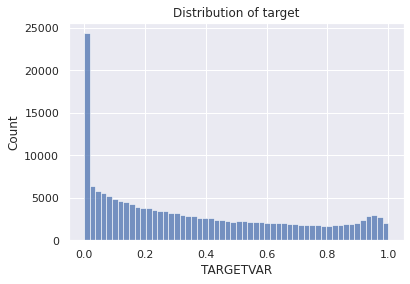

In [90]:
sns.histplot(data = df, x= df.TARGETVAR)
plt.title('Distribution of target');

Distribution of the target on each windfarm

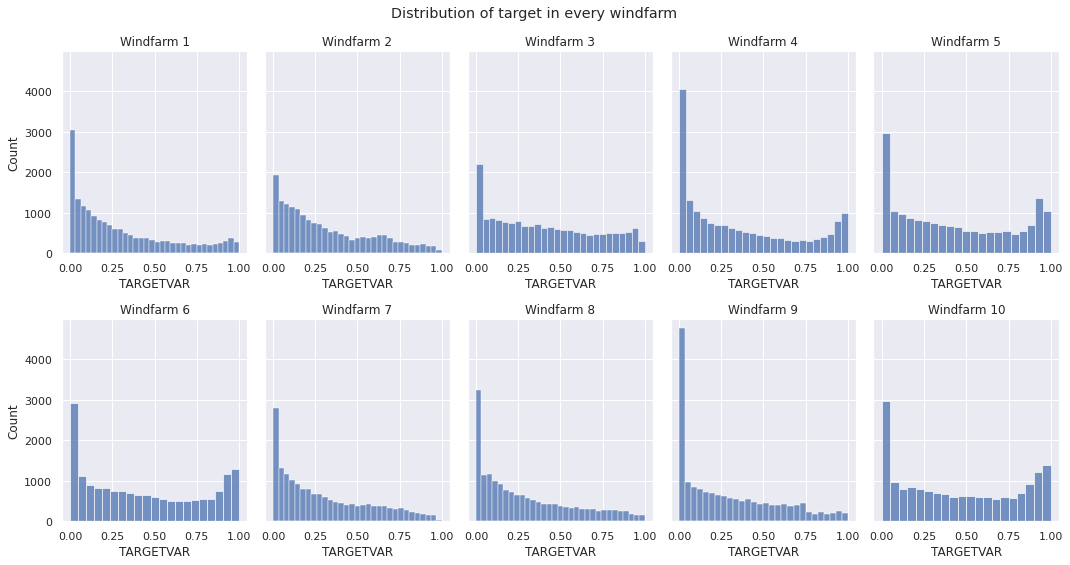

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharey=True, figsize=(15,8))
fig.suptitle('Distribution of target in every windfarm')
for zone in df.ZONEID.unique():
    plt.subplot(2,5,zone)   
    plt.title("Windfarm {}".format(zone))
    sns.histplot(data = df, x = df[df['ZONEID']==zone].TARGETVAR)
    
fig.tight_layout();

The target has many zero values. At which windspeeds does this happen? Of course, when the windspeed = 0 , then
the target is also 0. Without wind no energy. And also at low windspeed, as a windfarm needs a certain amount of windspeed
before it starts producing energy.

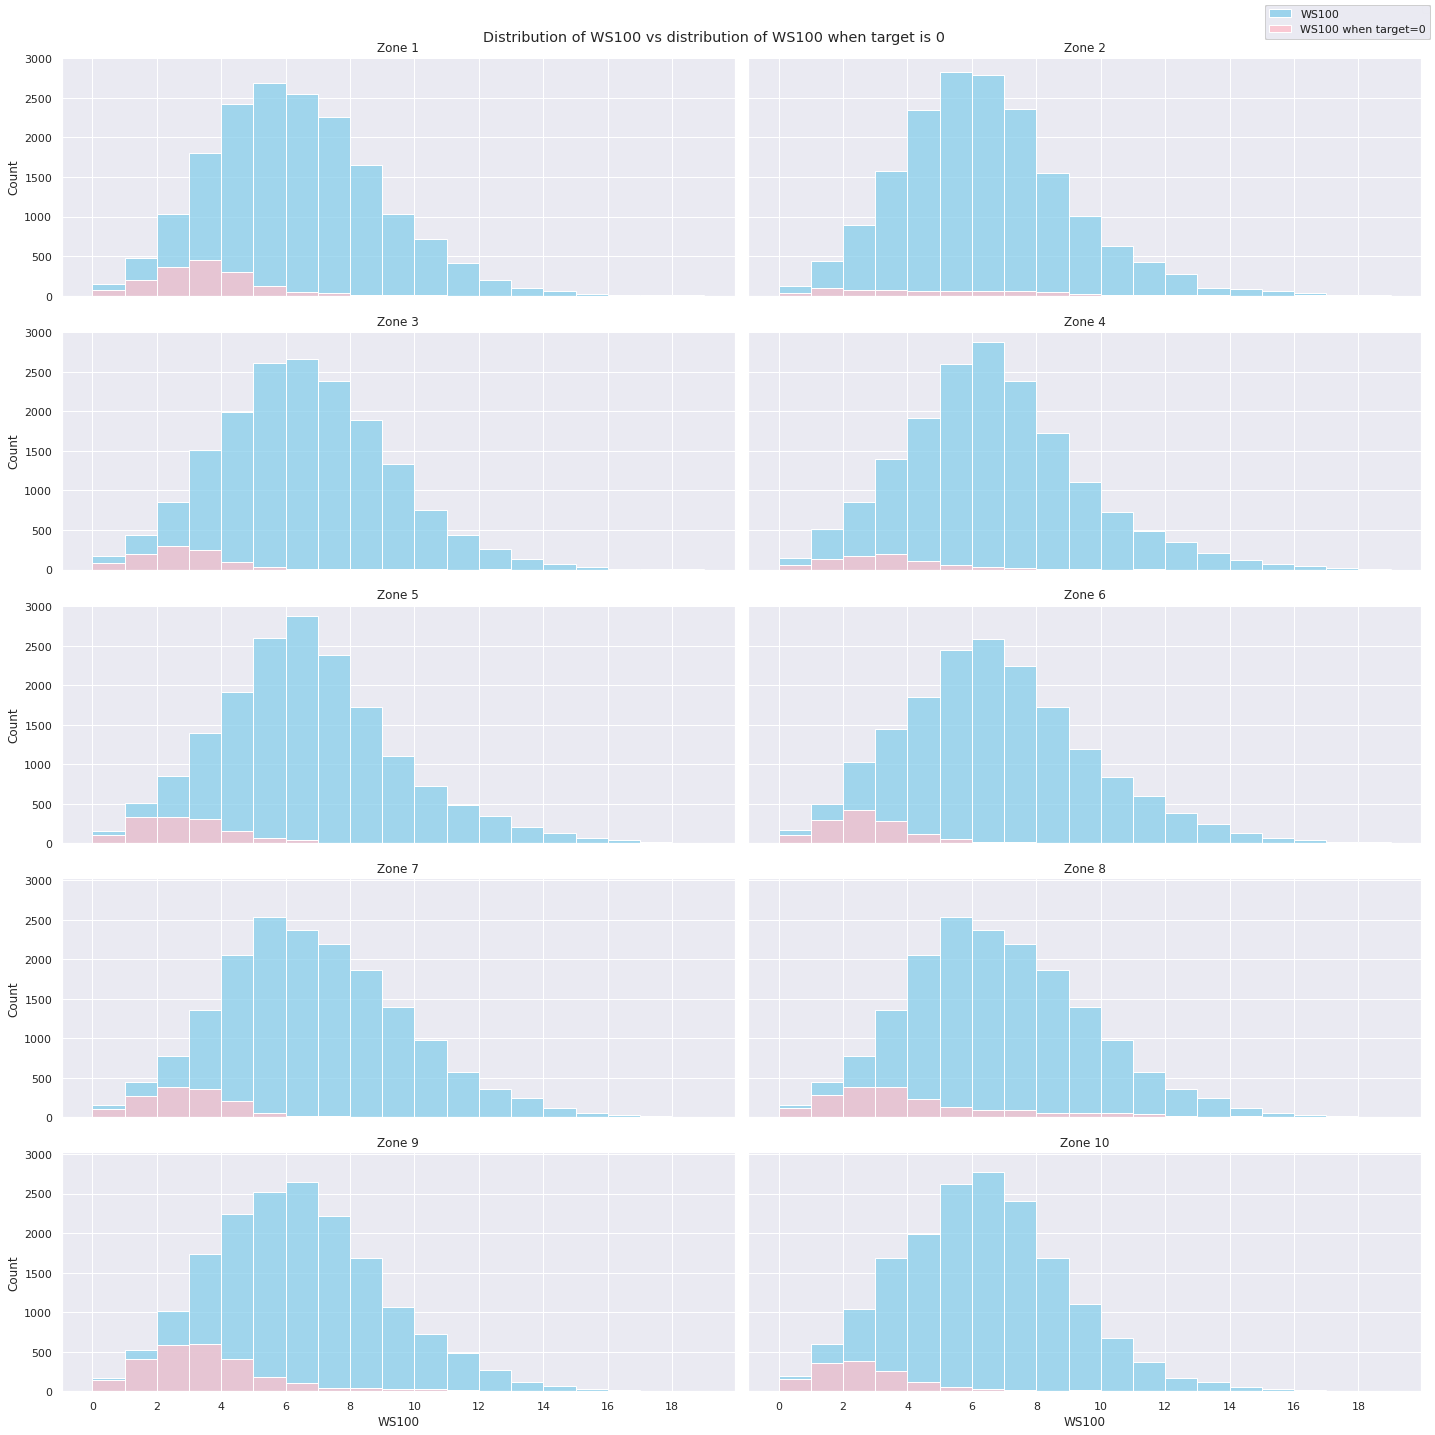

In [92]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20,20), sharex=True, sharey=True)
fig.suptitle('Distribution of WS100 vs distribution of WS100 when target is 0')

axs = axs.ravel()

for zone in df.ZONEID.unique():
    ax = axs[zone-1]
    fig.legend(labels = ["WS100", "WS100 when target=0"])
    df_zeros = df[(df['TARGETVAR'] == 0) & (df['ZONEID'] == zone)]
    sns.histplot(df[df['ZONEID'] == zone], x='WS100', color='skyblue', ax=ax, bins=range(0,20,1));
    sns.histplot(df_zeros, x='WS100', color='pink', ax=ax,bins=range(0,20,1));
    ax.set_xticks(range(0,20,2));
    ax.set_title('Zone {}'.format(zone))
    
plt.tight_layout()

Distribution of the Windspeed  ``` WS100``` on 100m. The windspeeds look normal distributed, and have values between 0 and 15 m/s.  

How often is the target = 0 per month per windfarm?

In [ ]:
df1 = data_zone[0]
df1 = df1[df1['date'] < pd.to_datetime('2013-01-01')]
df1_zeros = df1[df1['TARGETVAR'] == 0]
df1_zeros_g = df1_zeros.groupby(['ZONEID','month']).count().reset_index()[['month', 'TIMESTAMP']]
df1_zeros_g.columns = ['month', 'number_with_zero_output']


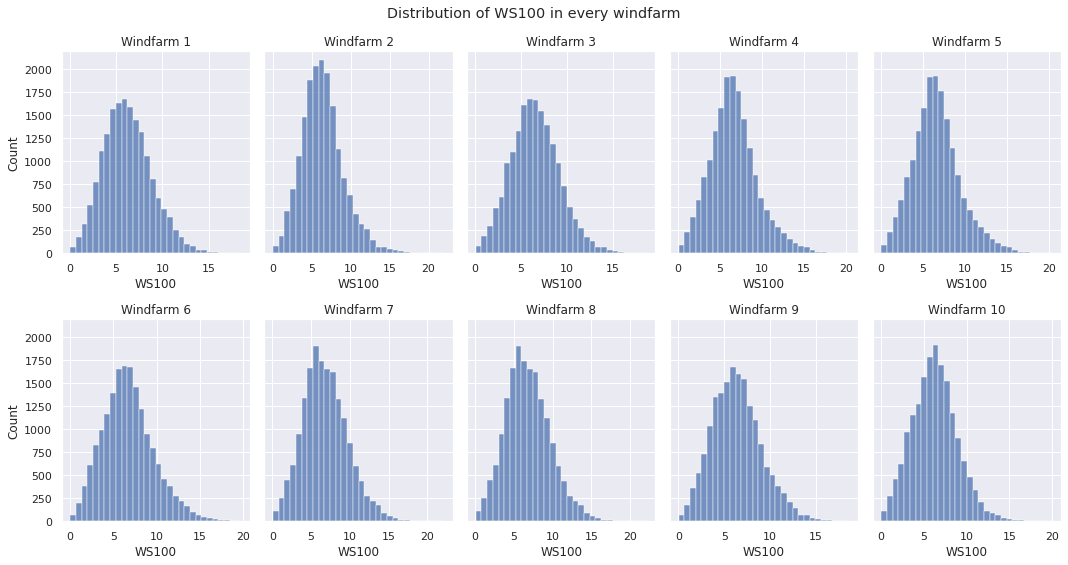

In [93]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharey=True,figsize=(15,8))
fig.suptitle('Distribution of WS100 in every windfarm')
for zone in df.ZONEID.unique():
    plt.subplot(2,5,zone)   
    plt.title("Windfarm {}".format(zone))
    sns.histplot(data = df, x = df[df['ZONEID']==zone].WS100, bins=30)
fig.tight_layout();   